<p class="pull-left">
ANLT_232_01-Intro to Data Visualization
</p>
<div class="pull-right">
<ul class="list-inline">
HW #1: Visualization and Analysis of Available Dataset(s)
</ul>
</div>

## Analysis of Housing in California

Ali Taheri 

 <blockquote style="border: 2px solid #666; padding: 10px; background-color: #acc;"><b>Part 1:</b> Description of Dataset</blockquote> 

The dataset that we selected for this assignment is the "California Housing Prices" dataset from the GitHub repository which is based on data from the 1990 census. This dataset in not up-to-date but would bring us a good insight about housing status in California as one of expensive states in 80's.

"This dataset is a modified version of the California Housing dataset available from Luís Torgo's page (University of Porto). Luís Torgo obtained it from the StatLib repository (which is closed now). The dataset may also be downloaded from StatLib mirrors.This dataset appeared in a 1997 paper titled Sparse Spatial Autoregressions by Pace, R. Kelley and Ronald Barry, published in the Statistics and Probability Letters journal. They built it using the 1990 California census data. It contains one row per census block group. A block group is the smallest geographical unit for which the U.S. Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people)." (qtd. in GitHub). <br/>
This "block group" could be considered as district for more clarification.

We will try to have some visualizations of this dataset to have a better understanding of housing status in that time.


<blockquote style="border: 2px solid #666; padding: 10px; background-color: #acc;"><b>Part 2:</b> Exploratory Data Analysis</blockquote> 

### Dataset Variables

There are 10 columns for each row that were collected by census bureau and fortunately their names are pretty self explanitory:

1 - <b>longitude</b>:   Longitude of district's centroid   (Angular value) <br>

2 - <b>latitude</b>: Latitude of district's centroid   (Angular value) <br>

3 - <b>housing_median_age</b>: Median age in years of all residential units of district <br>

4 - <b>total_rooms</b>: Total number of rooms of district's houses that contains bedroom, dining room and ... <br>

5 - <b>total_bedrooms</b>: Total number of bedrooms of district's houses <br>

6 - <b>population</b>: Total number of people that live in district permanently <br>
    
7 - <b>households</b>: Total number of households in district <br>

8 - <b>median_income</b>: Madian value of household income (Must be multplied by $10,0000) <br>

9 - <b>median_house_value</b>: Median value of house price in district (in USD) <br>

10 - <b>ocean_proximity</b>: Identifier of district's place with consideration of bay or ocean with values of ISLAND, NEAR BAY, NEAR OCEAN, INLAND, 1H OCEAN<br>



All first 9 variables are  <b> continuous </b> variables with type of float64.


### Data

We have data for 20640 districts in California .
We will try to have some detailed information about dataset by statistics and visualization.

In [148]:
%matplotlib inline

In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns 

In [150]:
# Load  the CA housing dataset into a dataframe
housing_df=pd.read_csv('housing.csv')

# Fast look of first 10 rows of dataset
housing_df.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [151]:
#A brief description of housing data frame
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


We can see there are 20640 rows and only total_bedrooms has 207 missing values. 
All of first 9 variables are float type and only ocean_proximity is a categorical variable. 
We can find proportions of places as below.

In [152]:
#Finding position of district against bay or ocean
housing_df["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [153]:
# Have a summary of all information for housing dataset
housing_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Above table shows summary of each variable that fortunately all of them are self-explainatory.
For example, population of each district is between 3 and 35682 with average of 1425 and standard deviation of 1132.
Also median house price in each district is between USD 14,999 and 500,001 with average of 206,855 and standard deviation of 115,395. It shows that California was an expensive state even 30 years ago.

Median Income of household per district was between USD 4,999 and 150,0000 with average of 38,706 and standard deviation of USD 18,998.

<blockquote style="border: 2px solid #666; padding: 10px; background-color: #acc;"><b>Part 3:</b> Data Visualization</blockquote> 

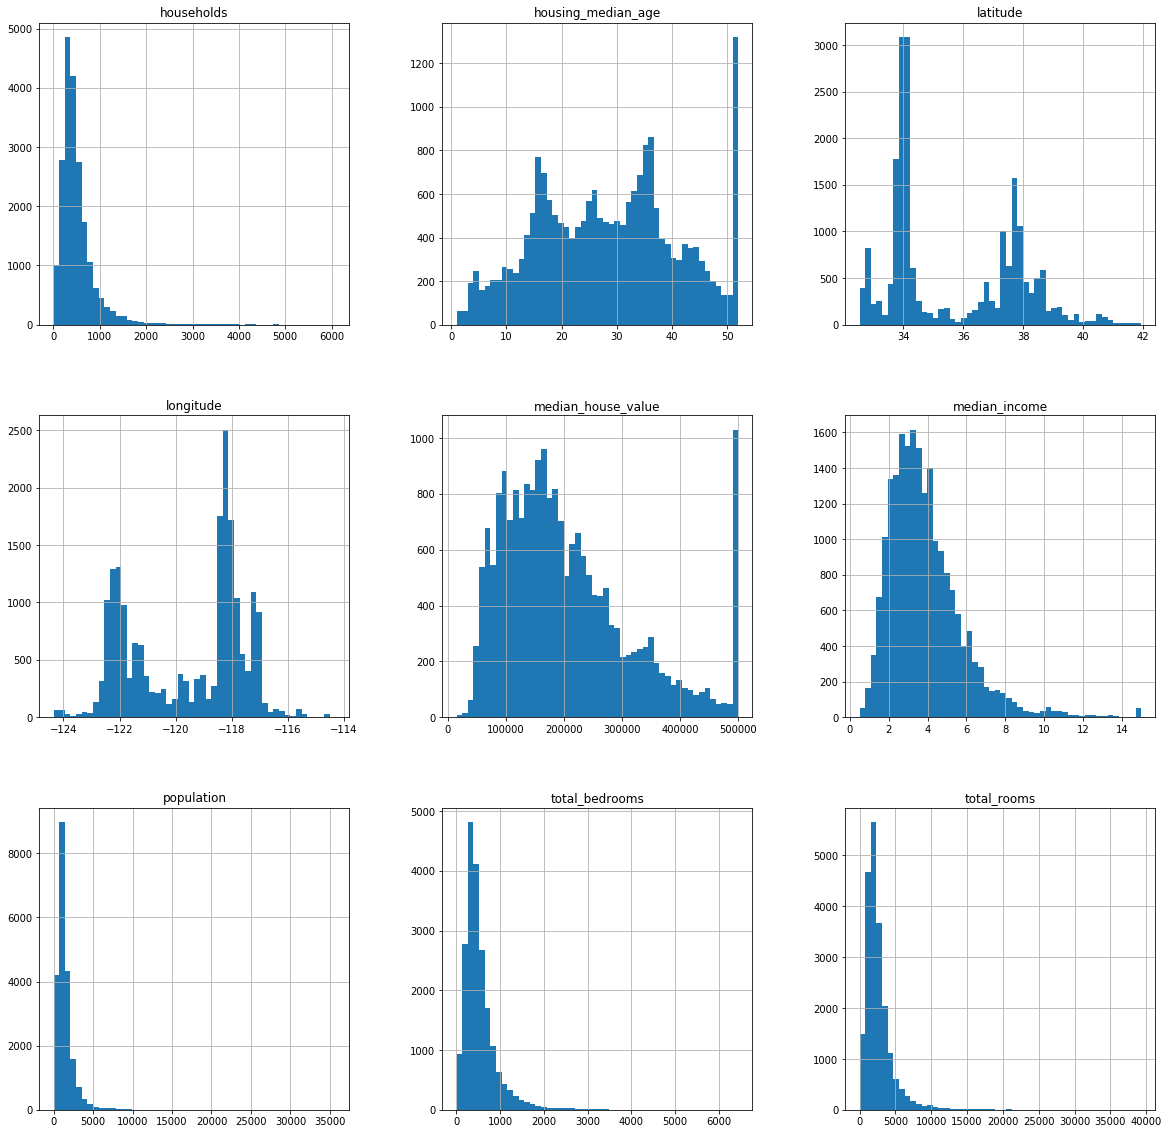

In [26]:
# Histogrom of all numerical attribute
housing_df.hist(bins=50, figsize=(20, 20))
plt.show()


Above histograms show distribution of observed inputs graphically. We could have suitable insight by each histogram.
We could describe some of them that are more important as below:

<b>Longitude and Latitude </b>: About geographical distributions of districts, it is interesting that both of longitude and latitudes are bimodal. By latitude, we could see that there is a very high concentration of districts about 34' that is area of Los Angeles and another peak is on approximately 38' that is bay area and San Francisco. Additionaly bay area in on longitude of about -121' and LA is on longitude of about -117' that it could be seen from histogram of longitude too.
It is obvious that south of California has more districts than north and we could see it from histogram of latitude. Also it is clear that there are a few of districts in central part of California that we could see it in both of latitide and longitude histograms. 

<b>House_Median_Age </b>: This histogram is multimodal and shows that 3 peaks are at 15,25 and 35 years and its average is about 29 years in California.

Other variables are unimodal and have long right tails. It seems that they do not follow normal distribution tightly and we could evaluate it as below: 

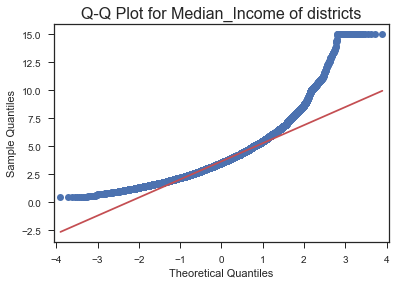

In [186]:
#Q-Q plot for median_income
sm.graphics.qqplot(housing_df.median_income,line='q')
plt.title("Q-Q Plot for Median_Income of districts", fontsize= 16)
plt.show()

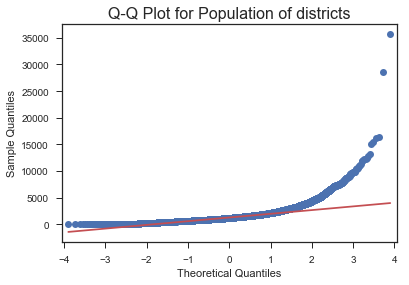

In [187]:
#Q-Q plot for population of districts
sm.graphics.qqplot(housing_df.population,line='q')
plt.title("Q-Q Plot for Population of districts", fontsize= 16)
plt.show()

Above Q-Q plots show that they have behaviour of normal distribution between -2*sd and 2*sd and it violates after these values.

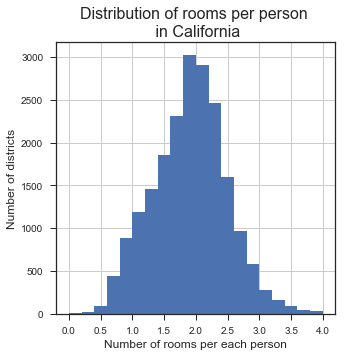

In [188]:
#Histogram about number of rooms for each person in different districts of California
tmp= housing_df['total_rooms']/housing_df['population']
(tmp[tmp<4]).hist(bins=20, figsize=(5,5))               #Consideration of houses with maximum of 4 rooms per each person
plt.title("Distribution of rooms per person \n in California", fontsize= 16)
plt.xlabel("Number of rooms per each person", fontsize=12)
plt.ylabel("Number of districts", fontsize=12)
plt.show()


We can see that each person has 2 rooms in average in California.

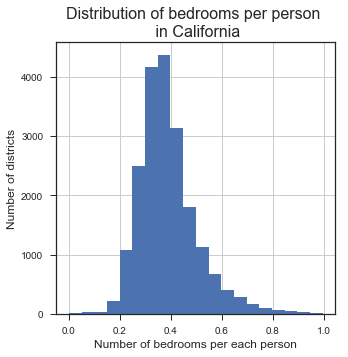

In [190]:
#Histogram about number of bedrooms for each person in different districts of California
tmp= housing_df['total_bedrooms']/housing_df['population']
(tmp[tmp<1]).hist(bins=20, figsize=(5,5))    #Consideration of houses with maximum of 1 bedroom per each person
plt.title("Distribution of bedrooms per person \n in California", fontsize= 16)
plt.xlabel("Number of bedrooms per each person", fontsize=12)
plt.ylabel("Number of districts", fontsize=12)
plt.show()

We can see that each person had .4 rooms in average in California. In other words, on average about 2.5 persons were sleeping in each bedroom of California. 

/Users/satah/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


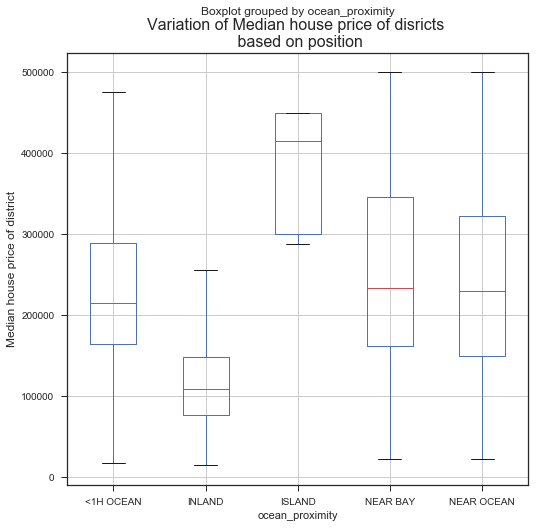

In [191]:
#Variation of median house price based on position
housing_df.boxplot(column="median_house_value",        # Column to plot
                    by= "ocean_proximity",        # Column to split upon
                     figsize= (8,8))
plt.title("Variation of Median house price of disricts \n based on position", fontsize= 16)
plt.ylabel("Median house price of district", fontsize=12)
plt.show()

We can see that price of house has reverse relation with distance to bay or ocean. If we want to order them from High to Low in average, it could be as following in average: <br>
1- ISLAND <br>
2- Near BAY <br>
3- NEAR OCEAN <br>
4- 1H OCEAN <br>
5- INLAND <br>

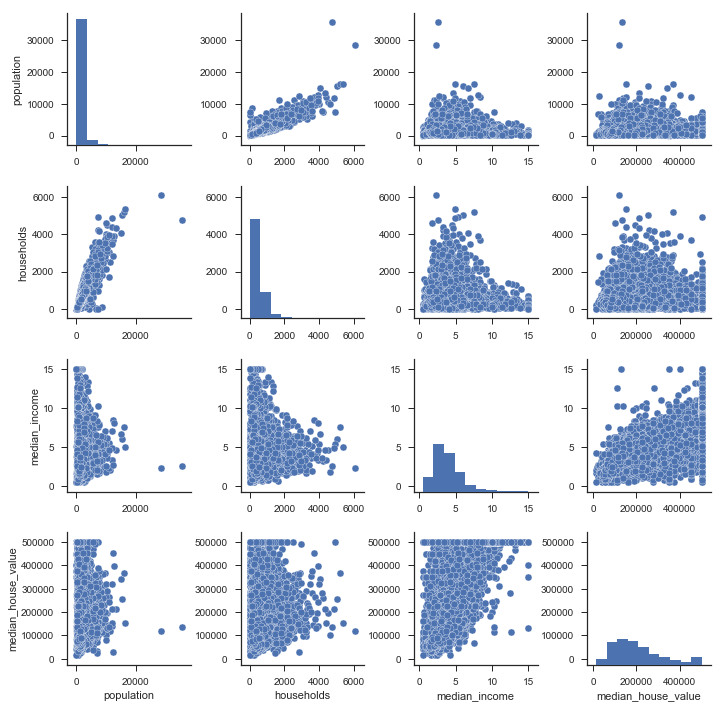

In [143]:
#Seaborn Pairplot
sns.set(style="ticks", color_codes=True)
sns.pairplot(housing_df.iloc[:,5:9])

Some scatter plots with seaborn package are shown above.For example, we can see that there is an approximate linear relation between population and number of households in districts of California.

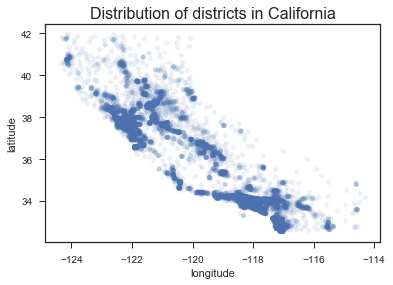

In [192]:
#Scatter plot of districts in California
housing_df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
plt.title("Distribution of districts in California", fontsize= 16)
plt.show()

Above scatterplot proves our thinking about distribution of districts over California. If you pay attention more,
it is same to geographical map of california. 

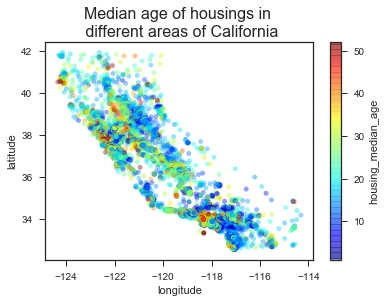

In [173]:
#Scatter plot of median age of houses of districts
housing_df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    c="housing_median_age", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.title("Median age of housings in \n different areas of California", fontsize= 16)
plt.legend()

Above diagram shows that a lot of houses in California were old and only there are some approximately new buildings in area of LA and a little in bay area too.

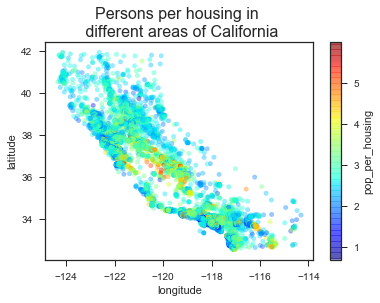

In [195]:
#Sactter plot about density of persons in houses of California

#Addition of a new column for population per housing
housing_df['pop_per_housing']= housing_df['population']/(housing_df['households']) 
#Excluding all districts with average pop_per_housing of more than 6
tmp=housing_df[housing_df['pop_per_housing']<6]
tmp.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    c="pop_per_housing", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.title("Persons per housing in \n different areas of California", fontsize= 16)
plt.legend()

Above diagram shows that approximately 3 persons were living in each household of California. Additionally more than 3 persons were living in each household of populated areass of LA, SF and San Diego.

<blockquote style="border: 2px solid #666; padding: 10px; background-color: #acc;"><b>Part 4:</b> Claim</blockquote> 

Housing price is a controversial issue in US.All US citizens are doing their best to purchase a suitable house for their family ASAP. Some people consider high price of properties in a district as a parameter for distinction between districts but i think the more accurate parameter is number of years that would take to purchase a house with all of income. I mean that we assume all income would be accumulated to purchase a house without any expense for daily life. I know that this assumption is not realistic but with my experience, results would be great.

In my opininin, this new parameter of 'year_to_purchase' in districts near to ocean would be higher than other districts.
We would examin it below.

In [176]:
#Finding average number of years would take to purchase a house in each area of California
housing_df['years_to_purchase']=housing_df['median_house_value']/(10000*housing_df['median_income'])
housing_df['years_to_purchase'].describe()

count    20640.000000
mean         5.650519
std          3.235592
min          0.357698
25%          3.856380
50%          4.950018
75%          6.587920
max        100.020204
Name: years_to_purchase, dtype: float64

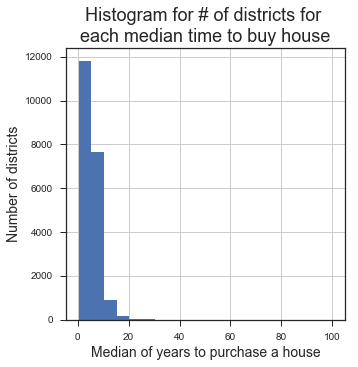

In [180]:
#Histogram of years_to_purchase
housing_df['years_to_purchase'].hist(bins=20, figsize=(5,5))
plt.title("Histogram for # of districts for \neach median time to buy house", fontsize= 18)
plt.xlabel("Median of years to purchase a house", fontsize=14)
plt.ylabel("Number of districts", fontsize=14)
plt.show()

With above histogram, we find that years_to_purchase for majority of districts is lower than 15, so we could exclude other districts for more clarification.

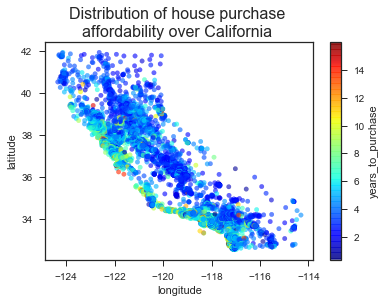

In [196]:
#Distribution of house purchase affordability over California 
tmp=housing_df[housing_df['years_to_purchase'] < 16]
tmp.plot(kind="scatter", x="longitude", y="latitude", alpha=0.6,
    c="years_to_purchase", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.title("Distribution of house purchase \naffordability over California ", fontsize= 16)
plt.legend()

It is interesting that on average, shoreline of Califonian is less affordable than other areas. It is obvious that there are some less affordable districts in other parts too but they are rear.

<blockquote style="border: 2px solid #666; padding: 10px; background-color: #acc;"><b>Question 5:</b> Summary</blockquote> 

We had a survey and initial analysis about housing status of Califonia in 1990. It was interesting that results from that time is not different fron current status of housings overally. We would try to find a new housing dataset of California and have more deep analysis on two datasets with difference of quarter. It would have great insights for us about important issue of housings in California definitely. 